# **Exploratory Data Analysis (EDA)**



**Author**: Grace Samuel  
**Project**: Biopharma Funding Analysis  
**Notebook Purpose**: This notebook explores the structure and distributions of the dataset to identify trends, detect outliers, evaluate data quality, and inform preprocessing and modeling decisions.

## 1. Import Libraries


The following libraries are used for data loading, statistical analysis, and visualization during exploratory data analysis.


In [1]:
# Data handling and statistics
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


## 2. Load Dataset


The dataset is uploaded via Google Colab's file upload interface and loaded into a pandas DataFrame for analysis.


In [2]:
# File upload interface for Google Colab
from google.colab import files

# Upload file manually
uploaded = files.upload()

# Load the uploaded Excel file into a DataFrame
df = pd.read_excel('final_dataset.xlsx')

# Preview the first few rows
df.head()



Saving final_dataset.xlsx to final_dataset.xlsx


,Company,Funding Title,Amount,Round,Announced,Status,Completed,Federal Fund Effective Rate,10yr Treasury Yield,All Investors This Round,...,Lead Investors All Rounds,Total Raised Private,Total Raised All Rounds,Funding Tags,Company Tags,Date Manually Updated,UUID,Target Company UUID,Profile,Documents & News
0,Sirnaomics Inc.,Sirnaomics - IPO - $64M,64.0,IPO,2021-11-01,Completed,2021-12-30,0.08,1.52,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-12-30,d1200d49f397a337,7c959e91424bc4ae,https://app.dealforma.com/funding/15725,https://app.dealforma.com/download/documents/4...
1,Sirnaomics Inc.,Sirnaomics - IPO - $300M - Postponed,300.0,IPO,2021-07-26,Terminated,NaT,NaN,NaN,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-27,1f1298bc3096f5f9,7c959e91424bc4ae,https://app.dealforma.com/funding/13931,https://app.dealforma.com/download/documents/4...
2,Sirnaomics Inc.,Sirnaomics - Series E - $105M,105.0,Series E,2021-07-01,Completed,2021-07-01,0.10,1.48,Rotating Boulder Fund; Undisclosed Investors (...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-02,adf72293ac2f05ca,7c959e91424bc4ae,https://app.dealforma.com/funding/13527,https://app.dealforma.com/download/documents/4...
3,Sirnaomics Inc.,Sirnaomics - Series D - $105M,105.0,Series D,2020-10-22,Completed,2020-10-22,0.09,0.87,Walvax Biotechnology Co. Ltd.; Sangel Capital ...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2020-10-23,2c69a725a536c128,7c959e91424bc4ae,https://app.dealforma.com/funding/11393,https://app.dealforma.com/download/documents/3...
4,Sirnaomics Inc.,Sirnaomics - Series C - $47M,47.0,Series C,2018-06-06,Completed,2019-04-26,2.44,2.51,Guangzhou Yuexiu Industrial Investment Fund (Y...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2019-04-29,05c8e4d2b5116eb2,7c959e91424bc4ae,https://app.dealforma.com/funding/8153,https://app.dealforma.com/download/documents/1...


## 3. Cleaning and Tidying the Dataset


This section standardizes column names, removes unused or redundant variables, cleans string formatting for categorical variables, converts data types, removes duplicate rows, and summarizes missingness. These steps ensure the dataset is clean and consistent before conducting exploratory analysis.


### 3.1 Convert Column Names to Snake Case


In [3]:
# Convert column names to snake_case
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace(r'[^\w\s]', '', regex=True)
)

# View updated column names
df.head()


,company,funding_title,amount,round,announced,status,completed,federal_fund_effective_rate,10yr_treasury_yield,all_investors_this_round,...,lead_investors_all_rounds,total_raised_private,total_raised_all_rounds,funding_tags,company_tags,date_manually_updated,uuid,target_company_uuid,profile,documents__news
0,Sirnaomics Inc.,Sirnaomics - IPO - $64M,64.0,IPO,2021-11-01,Completed,2021-12-30,0.08,1.52,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-12-30,d1200d49f397a337,7c959e91424bc4ae,https://app.dealforma.com/funding/15725,https://app.dealforma.com/download/documents/4...
1,Sirnaomics Inc.,Sirnaomics - IPO - $300M - Postponed,300.0,IPO,2021-07-26,Terminated,NaT,NaN,NaN,NaN,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-27,1f1298bc3096f5f9,7c959e91424bc4ae,https://app.dealforma.com/funding/13931,https://app.dealforma.com/download/documents/4...
2,Sirnaomics Inc.,Sirnaomics - Series E - $105M,105.0,Series E,2021-07-01,Completed,2021-07-01,0.10,1.48,Rotating Boulder Fund; Undisclosed Investors (...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2021-07-02,adf72293ac2f05ca,7c959e91424bc4ae,https://app.dealforma.com/funding/13527,https://app.dealforma.com/download/documents/4...
3,Sirnaomics Inc.,Sirnaomics - Series D - $105M,105.0,Series D,2020-10-22,Completed,2020-10-22,0.09,0.87,Walvax Biotechnology Co. Ltd.; Sangel Capital ...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2020-10-23,2c69a725a536c128,7c959e91424bc4ae,https://app.dealforma.com/funding/11393,https://app.dealforma.com/download/documents/3...
4,Sirnaomics Inc.,Sirnaomics - Series C - $47M,47.0,Series C,2018-06-06,Completed,2019-04-26,2.44,2.51,Guangzhou Yuexiu Industrial Investment Fund (Y...,...,Value Measured Investment; Guangzhou Yuexiu In...,267.0,331.0,NaN,siRNA (small interfering RNA); RNAi; LNP Deliv...,2019-04-29,05c8e4d2b5116eb2,7c959e91424bc4ae,https://app.dealforma.com/funding/8153,https://app.dealforma.com/download/documents/1...


### 3.2 Drop Unused Columns


In [4]:
# Drop columns that will not be used in analysis
columns_to_drop = [
    'funding_title', 'announced', 'status', 'all_investors_this_round',
    'all_tx_areas', 'all_technologies', 'company_description', 'website',
    'no_of_shares', 'price_per_share', 'pre_money_val', 'post_money_val',
    'country', 'ipodate_public', 'exchange', 'all_investors_all_rounds',
    'lead_investors_all_rounds', 'total_raised_private', 'funding_tags',
    'company_tags', 'date_manually_updated', 'uuid', 'target_company_uuid',
    'profile', 'documents__news'
]

df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
df.head()


,company,amount,round,completed,federal_fund_effective_rate,10yr_treasury_yield,lead_investor_this_round,lead_investor_co_type,stage_at_funding,primary_ta,indications,primary_tech,company_type,location,business_model,public_private,total_raised_all_rounds
0,Sirnaomics Inc.,64.0,IPO,2021-12-30,0.08,1.52,NaN,NaN,04 Phase II,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
1,Sirnaomics Inc.,300.0,IPO,NaT,NaN,NaN,NaN,NaN,04 Phase II,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
2,Sirnaomics Inc.,105.0,Series E,2021-07-01,0.10,1.48,Rotating Boulder Fund,Fin - VC / Private Equity,04 Phase II,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
3,Sirnaomics Inc.,105.0,Series D,2020-10-22,0.09,0.87,NaN,NaN,02 Preclinical / IND,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0
4,Sirnaomics Inc.,47.0,Series C,2019-04-26,2.44,2.51,Guangzhou Yuexiu Industrial Investment Fund (Y...,Fin - VC / Private Equity,02 Preclinical / IND,Cancer,NaN,RNA,Biopharma - Public Small,"Gaithersburg, Maryland, United States, North A...",Platform and Own Product Development,Private,331.0


### 3.3 Clean Categorical Value Names


In [5]:
# Clean location to just show state
df['location'] = df['location'].astype(str).str.split(',').str[1].str.strip()

# Remove numeric prefixes from stage_at_funding
df['stage_at_funding'] = df['stage_at_funding'].str.replace(r'^\d{2}\s+', '', regex=True)

# Remove "Biopharma -" prefix from company_type
df['company_type'] = df['company_type'].str.replace('Biopharma - ', '', regex=False)

# Keep only the first listed indication
df['indications'] = df['indications'].str.split(';').str[0].str.strip()

# Preview cleaned values
df.sample(5)


,company,amount,round,completed,federal_fund_effective_rate,10yr_treasury_yield,lead_investor_this_round,lead_investor_co_type,stage_at_funding,primary_ta,indications,primary_tech,company_type,location,business_model,public_private,total_raised_all_rounds
9408,Atomwise Inc.,6.00,Seed,2015-06-03,0.13,2.38,Data Collective (DCVC),Fin - VC / Private Equity,Platform / Discovery,Cancer,Autoimmune (General),Artificial Intelligence (AI) / Machine Learnin...,Private,California,Platform and Own Product Development,Private,174.0
7587,Invirsa Inc.,0.52,Seed,2017-11-07,1.16,2.32,CincyTech,Fin - VC / Private Equity,Phase II,Ophthalmic,NaN,Small Molecule,Private,Ohio,Early Stage R&D Only,Private,8.0
8351,TippingPoint Bioscience,NaN,Seed,2023-06-13,5.08,3.84,NaN,NaN,Platform / Discovery,Cancer,NaN,Stem Cell,Private,California,Platform Only Licensing,Private,NaN
9672,Juvaris BioTherapeutics Inc.,25.00,Series B,2010-01-27,0.12,3.66,SV Health Investors LLP,Fin - VC / Private Equity,Phase II,Infectious,Infectious (General),Vaccine,Private,California,Early Stage R&D Only,Private,25.0
9060,Cocoon Biotech Inc.,4.50,Debt / Loan,2019-11-04,1.56,1.79,NaN,NaN,Platform / Discovery,Inflammation,Osteoarthritis,Protein,Private,Massachusetts,Early Stage R&D Only,Private,4.0


### 3.4 Convert Data Types


In [6]:
# View current dtypes
df.dtypes

# Convert date and numeric columns
df['completed'] = pd.to_datetime(df['completed'], errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['federal_fund_effective_rate'] = pd.to_numeric(df['federal_fund_effective_rate'], errors='coerce')
df['10yr_treasury_yield'] = pd.to_numeric(df['10yr_treasury_yield'], errors='coerce')
df['total_raised_all_rounds'] = pd.to_numeric(df['total_raised_all_rounds'], errors='coerce')


### 3.5 Remove Duplicate Rows


In [7]:
# Check for and remove exact duplicate rows
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Remaining duplicate rows after drop:", df.duplicated().sum())


Duplicate rows: 88
Remaining duplicate rows after drop: 0


### 3.6 Summarize Missing Values


In [8]:
# Create a summary of missing values per column
missing_summary = df.isnull().sum().to_frame(name='missing_count')
missing_summary['missing_percent'] = (missing_summary['missing_count'] / len(df)) * 100

missing_summary.sort_values(by='missing_percent', ascending=False)


,missing_count,missing_percent
lead_investor_co_type,5679,59.205588
lead_investor_this_round,5679,59.205588
indications,2472,25.771476
10yr_treasury_yield,330,3.440367
amount,298,3.106756
total_raised_all_rounds,148,1.542952
completed,70,0.729775
federal_fund_effective_rate,70,0.729775
company,0,0.000000
stage_at_funding,0,0.000000


## 4. Exploratory Data Analysis Results


### 4.1 Summary Statistics: Continuous Variables

This table provides basic summary statistics and shape measures (skew and kurtosis) for the main continuous variables.


In [9]:
# Summary statistics for key continuous variables
continuous_vars = [
    'amount',
    'federal_fund_effective_rate',
    '10yr_treasury_yield',
    'total_raised_all_rounds'
]

summary_data = []
for var in continuous_vars:
    series = df[var].dropna()
    summary_data.append({
        'Variable': var,
        'Mean': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Skew': skew(series),
        'Kurtosis': kurtosis(series)
    })

summary_table = pd.DataFrame(summary_data)
summary_table.round(2)


,Variable,Mean,Median,Std Dev,Min,Max,Skew,Kurtosis
0,amount,93.38,30.00,262.08,0.10,6000.00,9.99,143.56
1,federal_fund_effective_rate,1.43,0.36,1.82,0.04,5.33,1.19,-0.05
2,10yr_treasury_yield,2.46,2.34,1.05,0.52,5.25,0.32,-0.62
3,total_raised_all_rounds,1388.46,226.00,6722.69,1.00,61740.00,7.41,55.81


### 4.2 Frequency Table: Stage at Funding

This table shows how frequently each stage of funding appears in the dataset.


In [10]:
counts = df['stage_at_funding'].value_counts(dropna=False)
percents = (counts / counts.sum() * 100).round(1)

stage_summary = pd.DataFrame({
    'Stage at Funding': counts.index,
    'Count': counts.values,
    'Percent': percents.values
})
stage_summary


,Stage at Funding,Count,Percent
0,Phase II,2232,23.3
1,Phase III,1698,17.7
2,Preclinical / IND,1497,15.6
3,Phase I,1420,14.8
4,Approved,1345,14.0
5,Platform / Discovery,1002,10.4
6,Not Disclosed,206,2.1
7,Not Applicable,150,1.6
8,Diagnostic - Any,23,0.2
9,Device - Any,19,0.2


### 4.3 Correlation Matrix (Correlogram)

This heatmap visualizes pairwise correlations among the continuous variables to assess potential collinearity.


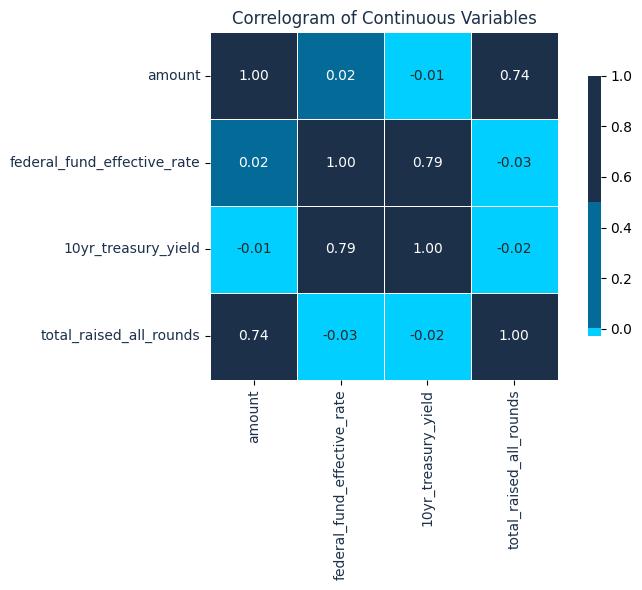

In [11]:
cont_vars = ['amount', 'federal_fund_effective_rate', '10yr_treasury_yield', 'total_raised_all_rounds']
corr_matrix = df[cont_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, annot=True, cmap=sns.color_palette(['#B3EFFF', '#00CFFF', '#046B99', '#1C304A']),
    center=0, fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.75}
)
plt.title('Correlogram of Continuous Variables', color='#1C304A')
plt.xticks(color='#1C304A')
plt.yticks(color='#1C304A')
plt.tight_layout()
plt.show()


### 4.4 Distribution of Funding Amount (Target Variable)

The following histogram shows the distribution of `amount` after removing the top 1% of outliers to improve visibility.


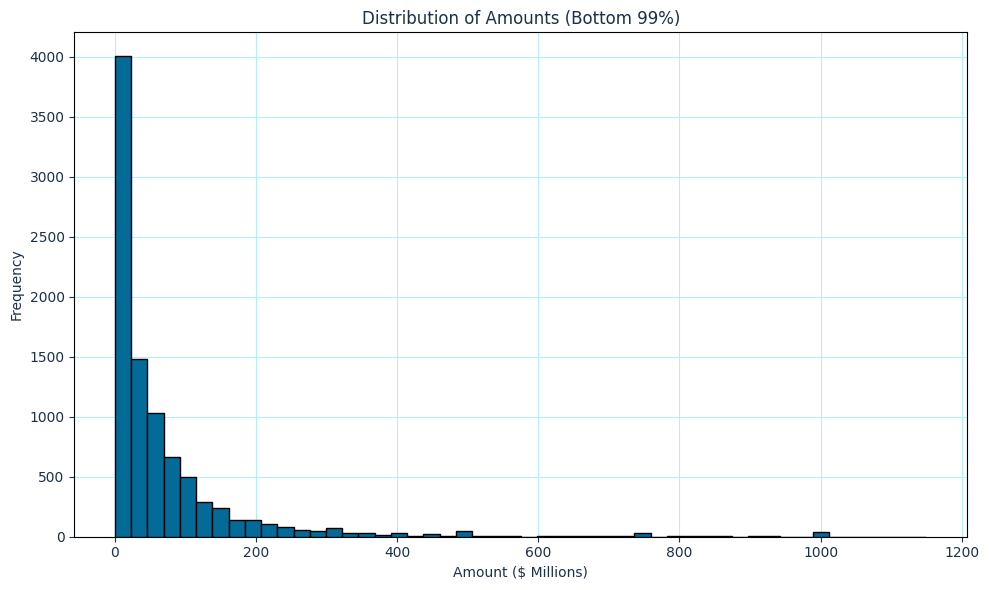

In [12]:
# Remove top 1% of funding amounts for clearer distribution
cutoff = df['amount'].quantile(0.99)
df_filtered = df[df['amount'] <= cutoff]

# Plot histogram using accessible color palette
plt.figure(figsize=(10, 6))
plt.grid(True, color='#B3EFFF', zorder=0)
plt.hist(df_filtered['amount'], bins=50, color='#046B99', edgecolor='#000000', zorder=3)
plt.title('Distribution of Amounts (Bottom 99%)', color='#1C304A')
plt.xlabel('Amount ($ Millions)', color='#1C304A')
plt.ylabel('Frequency', color='#1C304A')
plt.tick_params(colors='#1C304A')
plt.tight_layout()
plt.show()


### 4.5 Top 20 Most Frequent Companies

This bar chart displays the companies that appear most frequently in the dataset. It helps identify repeated records or particularly active firms.


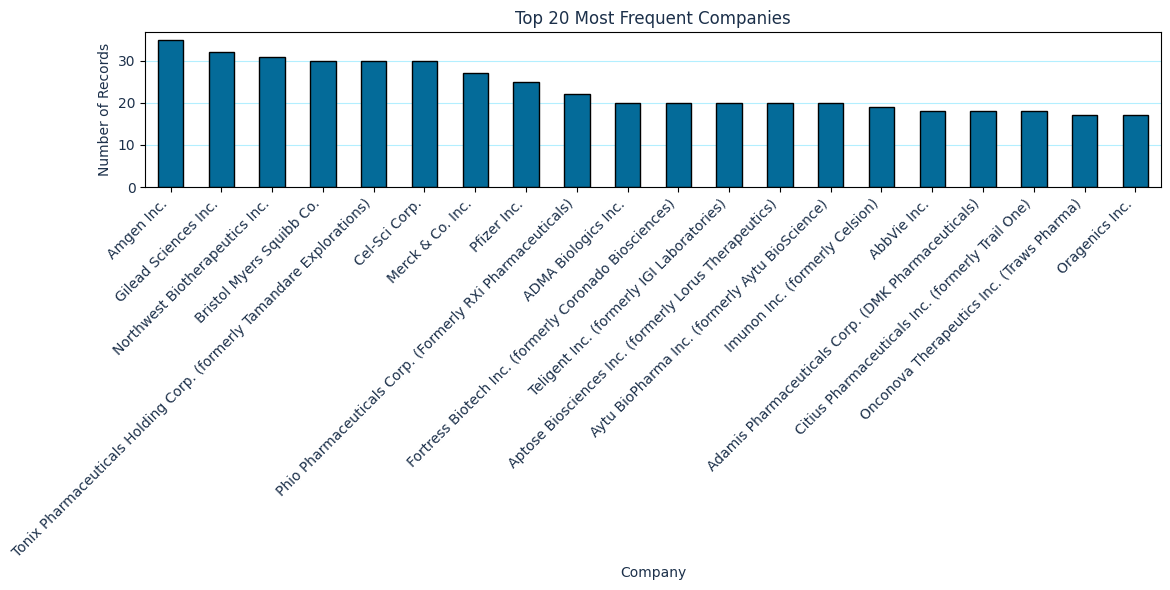

In [13]:
# Count most frequent companies
company_counts = df['company'].value_counts().head(20)

# Bar plot
plt.figure(figsize=(12, 6))
company_counts.plot(kind='bar', color='#046B99', edgecolor='#000000', zorder=2)
plt.title('Top 20 Most Frequent Companies', color='#1C304A')
plt.xlabel('Company', color='#1C304A')
plt.ylabel('Number of Records', color='#1C304A')
plt.xticks(rotation=45, ha='right', color='#1C304A')
plt.yticks(color='#1C304A')
plt.grid(axis='y', color='#B3EFFF', zorder=1)
plt.tight_layout()
plt.show()


### 4.6 Funding by Year (Public vs. Private)

The plot below illustrates trends in total funding across time, broken out by public vs. private companies.


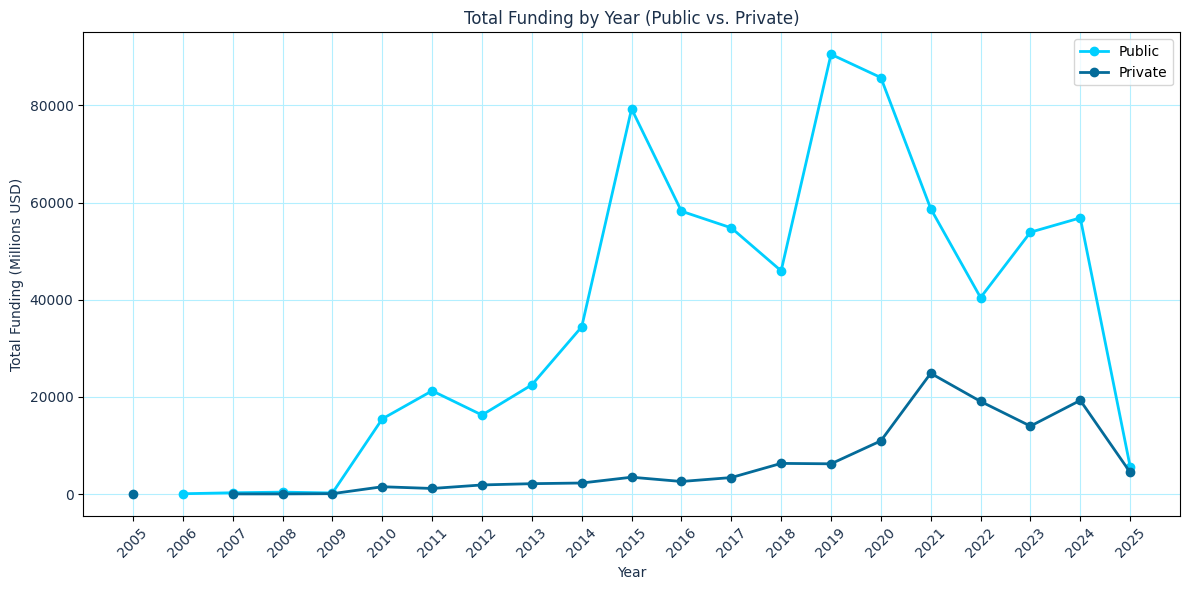

In [14]:
# Ensure 'completed' is datetime and extract year
df['completed'] = pd.to_datetime(df['completed'], errors='coerce')
df['year'] = df['completed'].dt.year

# Group by year and public/private status
grouped = df.groupby(['year', 'public_private'])['amount'].sum().unstack()

# Ensure year is integer
grouped.index = grouped.index.astype(int)

# Plot funding trends by year
plt.figure(figsize=(12, 6))

if 'Public' in grouped.columns:
    plt.plot(grouped.index, grouped['Public'], marker='o', label='Public', color='#00CFFF', linewidth=2)
if 'Private' in grouped.columns:
    plt.plot(grouped.index, grouped['Private'], marker='o', label='Private', color='#046B99', linewidth=2)

plt.title('Total Funding by Year (Public vs. Private)', color='#1C304A')
plt.xlabel('Year', color='#1C304A')
plt.ylabel('Total Funding (Millions USD)', color='#1C304A')
plt.grid(True, color='#B3EFFF')
plt.xticks(ticks=grouped.index, rotation=45, color='#1C304A')
plt.yticks(color='#1C304A')
plt.legend()
plt.tight_layout()
plt.show()


### 4.7 Top 20 Lead Investors

This chart highlights the investors who most frequently led funding rounds in the dataset.


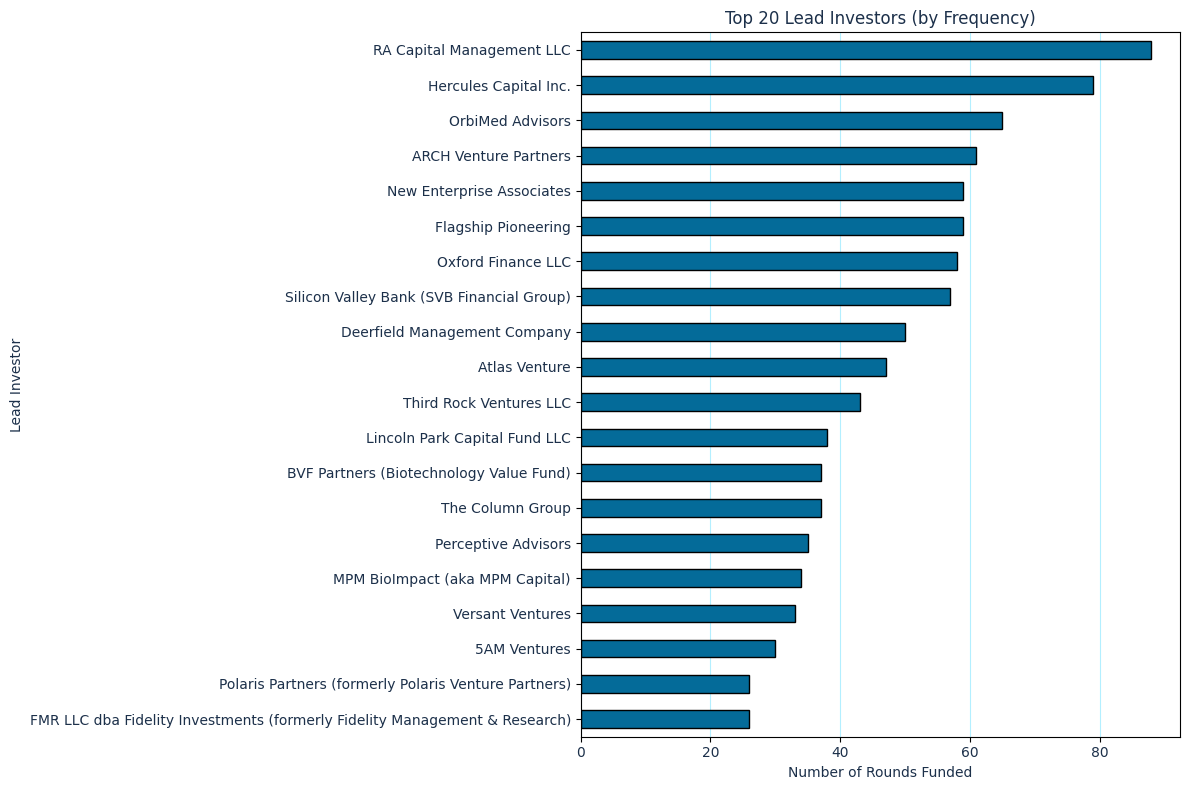

In [15]:
# Count top 20 lead investors
top_investors = df['lead_investor_this_round'].value_counts().head(20)

# Horizontal bar plot
plt.figure(figsize=(12, 8))
top_investors.plot(kind='barh', color='#046B99', edgecolor='#000000', zorder=2)
plt.title('Top 20 Lead Investors (by Frequency)', color='#1C304A')
plt.xlabel('Number of Rounds Funded', color='#1C304A')
plt.ylabel('Lead Investor', color='#1C304A')
plt.gca().invert_yaxis()
plt.tick_params(labelcolor='#1C304A')
plt.grid(True, axis='x', color='#B3EFFF', zorder=1)
plt.tight_layout()
plt.show()


### 4.8 Funding by Company Type (Bivariate)

A boxplot and jittered scatter overlay show how funding amounts vary by company type. Outliers above the 95th percentile are excluded.


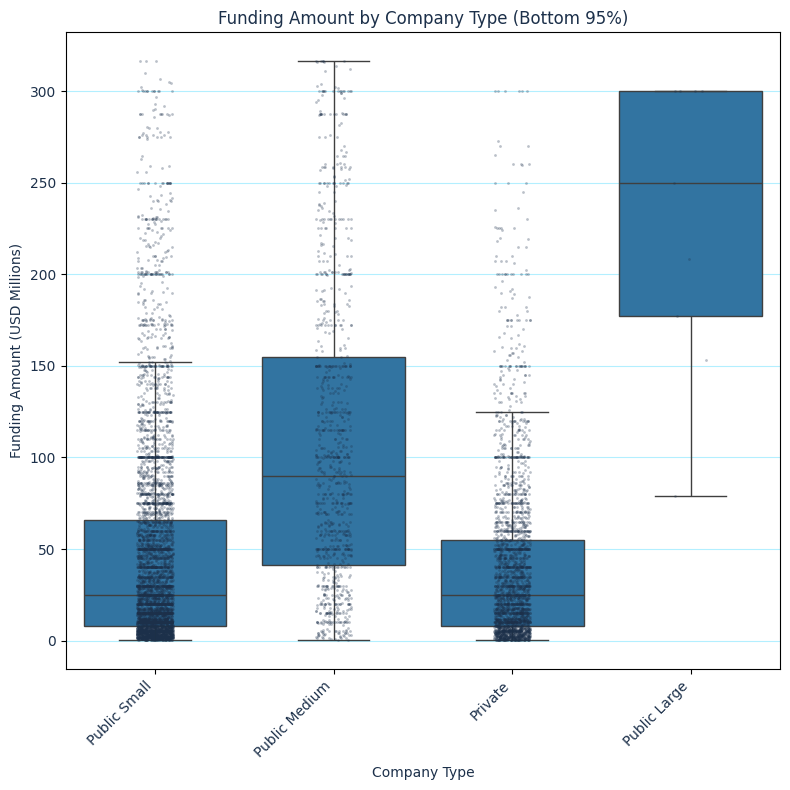

In [16]:
# Remove top 5% of outliers
filtered_df = df[df['amount'] <= df['amount'].quantile(0.95)]

# Boxplot and jittered stripplot
plt.figure(figsize=(8, 8))
sns.boxplot(x='company_type', y='amount', data=filtered_df, showfliers=False)
sns.stripplot(x='company_type', y='amount', data=filtered_df,
              color='#1C304A', size=2, jitter=True, alpha=0.3)

plt.title('Funding Amount by Company Type (Bottom 95%)', color='#1C304A')
plt.xlabel('Company Type', color='#1C304A')
plt.ylabel('Funding Amount (USD Millions)', color='#1C304A')
plt.xticks(rotation=45, ha='right', color='#1C304A')
plt.yticks(color='#1C304A')
plt.grid(True, axis='y', color='#B3EFFF')
plt.tight_layout()
plt.show()


### 4.9 Frequency Charts for Categorical Predictors

Bar charts below show the frequency distributions of the remaining categorical predictors to identify class imbalances or dominant categories.


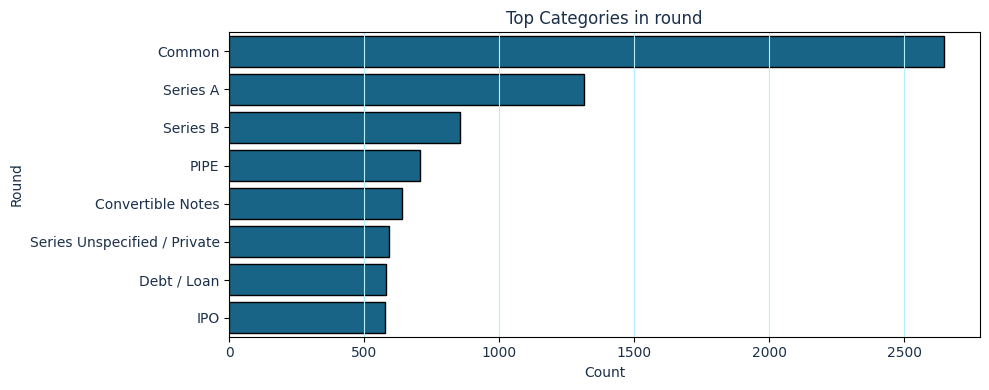

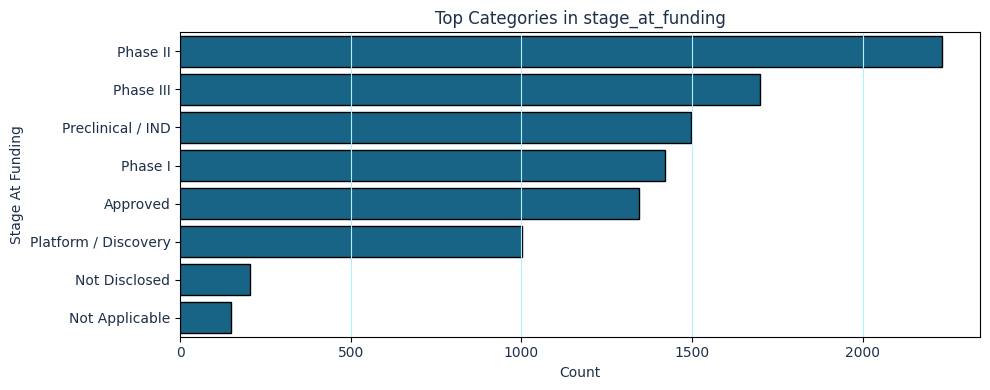

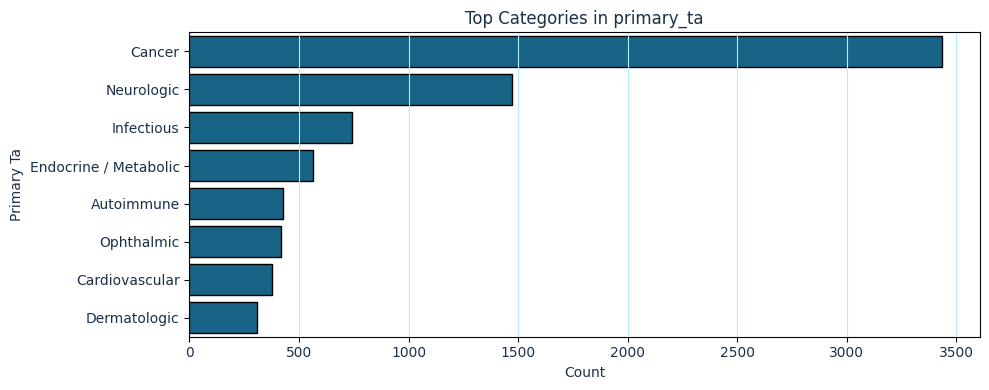

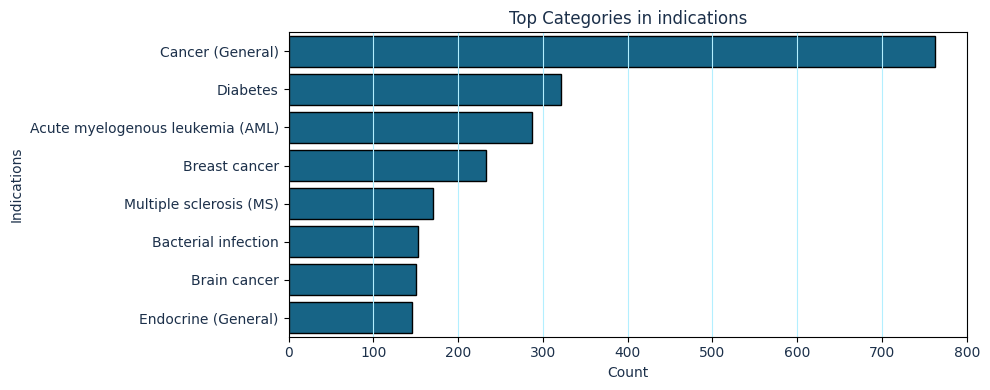

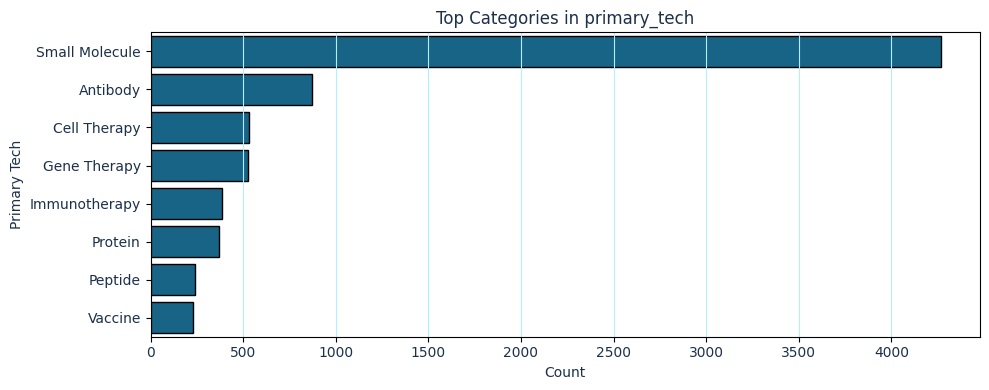

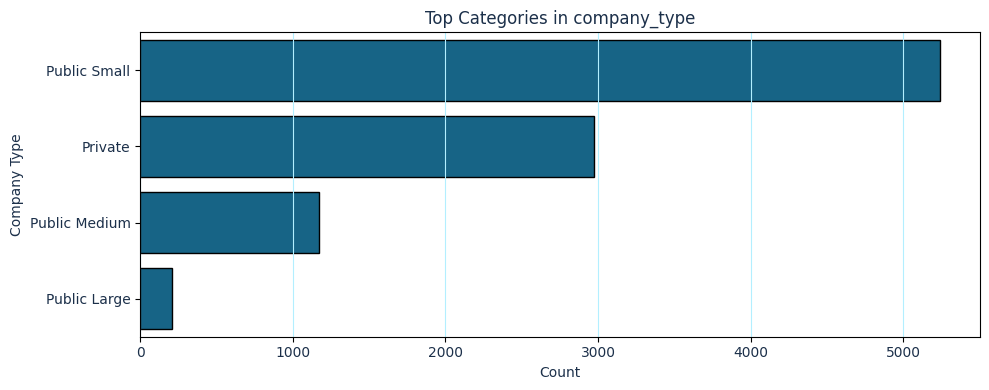

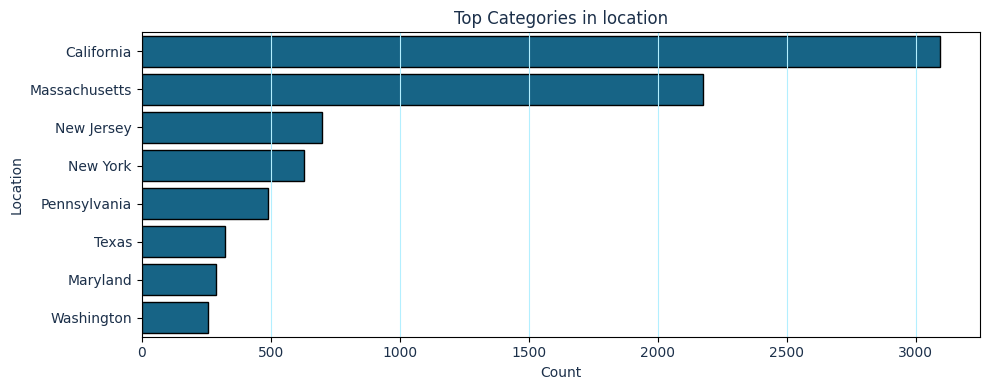

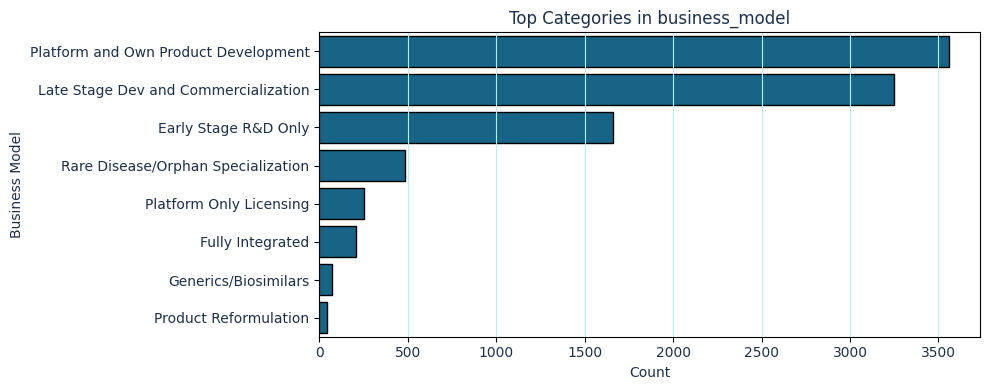

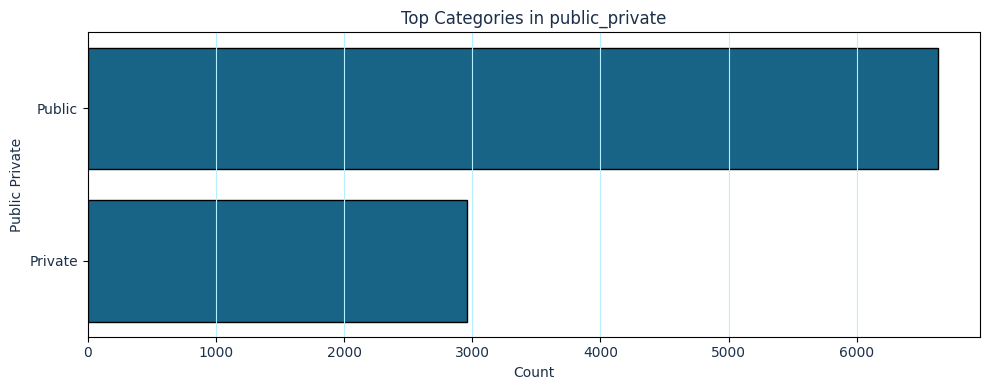

In [18]:
# Columns to plot
columns = [
    'round', 'stage_at_funding', 'primary_ta', 'indications',
    'primary_tech', 'company_type', 'location', 'business_model', 'public_private'
]

# Plot top 8 categories for each variable
for col in columns:
    top_counts = df[col].value_counts().head(8)

    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_counts.values, y=top_counts.index, color='#046B99', edgecolor='#000000')
    plt.title(f'Top Categories in {col}', color='#1C304A')
    plt.xlabel('Count', color='#1C304A')
    plt.ylabel(col.replace('_', ' ').title(), color='#1C304A')
    plt.tick_params(labelcolor='#1C304A')
    plt.grid(True, axis='x', color='#B3EFFF')
    plt.tight_layout()
    plt.show()


## 5. Summary and Next Steps


This exploratory analysis revealed several important insights that will guide the preprocessing and modeling phases:

- The target variable `amount` is right-skewed and will benefit from log transformation.
- Some predictors contain high-cardinality categorical values and will need collapsing or encoding.
- Missingness is generally low, with targeted imputation needed for `federal_fund_effective_rate` and `completed_year`.
- Strong correlations exist between `amount` and other financial variables, as seen in the correlogram.
- Bivariate plots show meaningful variation in funding across company types and other categories.

**Next Steps**:
- Perform targeted feature engineering and encoding.
- Handle missing values using appropriate imputation strategies.
- Scale and transform features for modeling.
- Begin predictive modeling with linear and non-linear regression techniques.

## 6. Save Final Datasets

In [ ]:
# Save the cleaned and structured dataset for modeling
df.to_csv('updated_dataframe.csv', index=False)

# If using Google Colab, download the file
from google.colab import files
files.download('updated_dataframe.csv')


## 7. Code Validation Note

> Code has been tested and runs without error in both Google Colab and local environments.  
> Visualizations use an accessible color palette, and key checkpoints were included to verify cleaning steps, missing values, and distributions.  
> This notebook is now ready to feed into preprocessing and modeling workflows.
